In [1]:
import masknmf
from mbo_utilities import imread, imwrite, get_files
import tifffile

import fastplotlib as fpl

Image(value=b'version https://git-lfs.github.com/spec/...', height='55', width='300')

Valid,Device,Type,Backend,Driver
✅ (default),NVIDIA RTX A4000,DiscreteGPU,Vulkan,553.09
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
❗ limited,Microsoft Basic Render Driver,CPU,D3D12,
❌,NVIDIA RTX A4000/PCIe/SSE2,Unknown,OpenGL,4.6.0 NVIDIA 553.09


Saving plane06_stitched.tiff:   0%|          | 0/37 [00:00<?, ?it/s]

Saving plane07_stitched.tiff:   0%|          | 0/37 [00:00<?, ?it/s]

Saving plane08_stitched.tiff:   0%|          | 0/37 [00:00<?, ?it/s]

[25-10-26 14:11:41]: Starting compression
[25-10-26 14:11:41]: sampled from the following regions: [0]
[25-10-26 14:11:41]: We are initializing on a total of 1574 frames
[25-10-26 14:11:41]: Loading data to estimate complete spatial basis
[25-10-26 14:11:41]: skipping the pruning step for frame cutoff
[25-10-26 14:11:41]: Finding spatiotemporal roughness thresholds


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:01<00:00, 155.37it/s]

[25-10-26 14:11:43]: Running Blockwise Decompositions


[25-10-26 14:11:54]: Constructed U matrix. Rank of U is 5815
[25-10-26 14:11:55]: PMD Objected constructed


RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
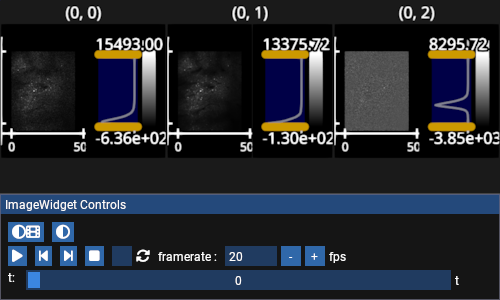

In [3]:
data = imread("D://demo//raw")
data.fix_phase=True
data.use_fft=True
out_tif_path = "D://demo//tiffs"

imwrite(data, out_tif_path, planes=[6,7,8], roi=None, overwrite=True)

tiff_files = get_files("D://demo//tiffs", str_contains="tif")

data = tifffile.imread(tiff_files[0])

block_sizes = [32, 32]
max_components = 20
device = "cuda"
num_frames_for_spatial_fit = data.shape[0] #How many frames we use to estimate the spatial basis in PMD

pmd_result = masknmf.compression.pmd_decomposition(data,
                                                block_sizes,
                                                num_frames_for_spatial_fit,
                                                max_components = max_components,
                                               device = device,
                                               frame_batch_size = 1024)



import fastplotlib as fpl
pmd_residual = masknmf.PMDResidualArray(data, pmd_result)
iw = fpl.ImageWidget(data = [data, pmd_result, pmd_residual], figure_shape = (1, 3))
iw.cmap = "gray"
iw.show()